In [36]:
pwd

'/home/vmu/nu_stats/examples/bayes_hierarchical_model'

In [37]:
%cd examples/bayes_hierarchical_model/

[Errno 2] No such file or directory: 'examples/bayes_hierarchical_model/'
/home/vmu/nu_stats/examples/bayes_hierarchical_model


In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# SIM

In [39]:
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt

In [40]:
import sys
sys.path.append("../../")
from nu_stats.simulation import Simulation
from nu_stats.plotting import unit_vectors_skymap as u_v_s

In [41]:
# Simulation parameters
L = 1e48 * (u.erg/u.s)
gamma = 2.2
z = 0.3
F_diff_norm = 1e-15 * 1/(u.GeV * u.cm**2 * u.s)
atm_flux_norm = 1e-15 * 1/(u.GeV * u.cm**2 * u.s)
Emin = 1e5 * u.GeV
Emax = 1e8 * u.GeV
Enorm = 1e5 * u.GeV

In [42]:
sim = Simulation(L, gamma, z, Emin=Emin, Emax=Emax, Enorm=Enorm,N_events = 100000)
sim.run(seed=2314)
sim_dat = sim.get_data()


In [43]:
diff_bg_sim = Simulation(F_diff_norm=F_diff_norm, Emin=Emin, Emax=Emax, Enorm=Enorm, N_events=100000)
diff_bg_sim.run(seed=145678)
diff_bg_dat = diff_bg_sim.get_data()

In [44]:
atm_bg_sim = Simulation(atm_flux_norm=atm_flux_norm, Emin=Emin, Emax=Emax, Enorm=Enorm, N_events=100000)
atm_bg_sim.run(seed=12345678)
atm_bg_dat = atm_bg_sim.get_data()

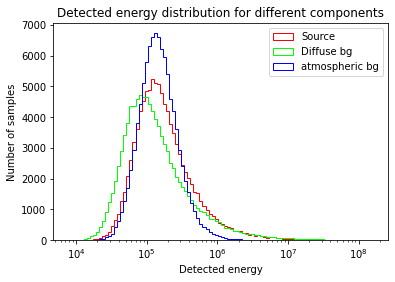

In [52]:
fig, ax = plt.subplots()
cols = [(1,0,0),(0,1,0),(0,0,1)]
dats = [sim_dat,diff_bg_dat,atm_bg_dat]
allE = np.array([dat['Edet'] for dat in dats])
minE = allE.min()
maxE = allE.max()
logbins = np.logspace(np.log10(minE),np.log10(maxE), 101)
for i,dat in enumerate(dats):
    plt.hist(dat['Edet'],histtype='step', bins=logbins,color=cols[i])
plt.xscale('log')
plt.legend(['Source', 'Diffuse bg', 'atmospheric bg'])
ax.set_ylabel('Number of samples')
ax.set_xlabel('Detected energy')
plt.title('Detected energy distribution for different components')

fig.show()